In [66]:
import numpy as np
import matplotlib.pyplot as plt


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      The Learning rate 0 to 1.0, smaller then easier to converge
    n_iter : int
      number of iterations (maximum)
    random_state : int
      Random number generator seed for random weight used for initialization
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1, cov=0.05):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.cov=cov

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            if np.sum(self.errors_[-5:])<=self.cov:
              break
#if converges then stop earlier (a rough check of convergency)
        return self
                                  
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

<hr>

### Note: 
The simplest perceptron
stop fitting on conditions: 1) iteration complete or 2) Converge, the convergency checking is a naive check


In [73]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)

In [100]:
y=df.iloc[10:90,4].values
z=np.unique(y)
y = np.where(y == z[1], -1, 1)
x = df.iloc[10:90, [0, 2]].values



### Note:
Form the training data set

In [101]:
xt = np.append(df.iloc[0:8,[0,2]].values,df.iloc[91:100,[0,2]].values,axis=0)
yt=np.append(df.iloc[0:8,4].values,df.iloc[91:100,4].values,axis=0)
yt = np.where(yt == z[1], -1, 1)


### Note: 
Form the testing set
Can change the data range to check if/how the training converges --> Convergency is not guaranteed 

Text(0,0.5,'Number of updates')

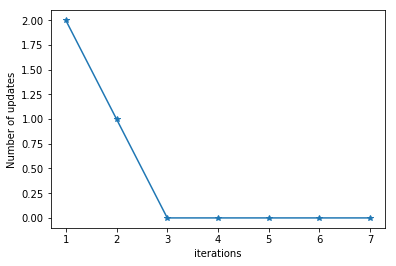

In [102]:
ppn = Perceptron(eta=0.001, n_iter=50,cov=0.0001)

ppn.fit(x, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='*')
plt.xlabel('iterations')
plt.ylabel('Number of updates')
